https://www.kaggle.com/sagnik1511/flower-recognition-93-accuracy-with-neural-nets

# Importing required libraries

In [6]:
# !pip install mlxtend

In [1]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print('version of tensorflow :',tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import os
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

version of tensorflow : 2.4.0


# Gathering file paths

In [2]:
link='tobacco_all/'

In [3]:
import os

list_dir = []
for file in os.listdir(link):
    list_dir.append(link+file)
#     print(link+file)

In [4]:
list_dir[:3]

['tobacco_all/AFTER 8',
 'tobacco_all/Al Fakher - Мультифрукт',
 'tobacco_all/Al Fakher Apple (бестабачная смесь)']

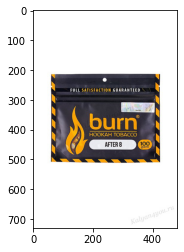

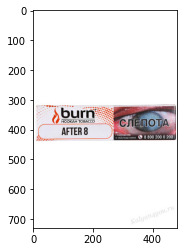

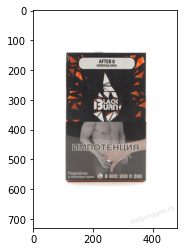

In [11]:
k=0
for fil in os.listdir(list_dir[0] + '/'):
    link=list_dir[0] + '/' + fil
    img = mpimg.imread(link)
    plt.imshow(img)
    plt.show()
    k+=1
    if k==3:
        break

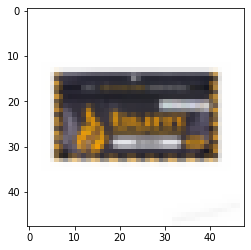

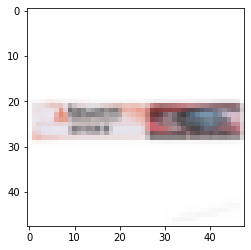

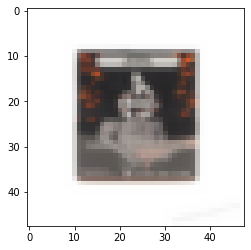

In [12]:
k = 0
for fil in os.listdir(list_dir[0] + '/'):
    link = list_dir[0] + '/' + fil
    img = mpimg.imread(link)
    img = resize(img, (48, 48, 3), anti_aliasing=True)
    plt.imshow(img)
    plt.show()
    k += 1
    if k == 3:
        break

# Dataframe Generation

In [29]:
def create_dataframe(path, arr, label):
    for fil in os.listdir(path):
        link = path + '/' + fil
        if link[-3:] == 'pyc' or link[-2:] == 'py':
            continue
        img = mpimg.imread(link)
        img = resize(img, (48, 48, 3), anti_aliasing=True)
        img = img.reshape(6912)
        arr.append(img)
    xx = np.ones(len(arr)) * label
    arr = pd.DataFrame(arr)
    xx = pd.DataFrame({'label': xx})
    arr = pd.concat([xx, arr], axis=1)
    return arr

In [28]:
path = list_dir[1]

for fil in os.listdir(path):
        link = path + '/'+ fil
        print(link)

tobacco_all/Al Fakher - Мультифрукт/6f988e5f5a29bdf0cecc190768aabe0c.gif


In [14]:
list_dir[:4]

['tobacco_all/AFTER 8',
 'tobacco_all/Al Fakher - Мультифрукт',
 'tobacco_all/Al Fakher Apple (бестабачная смесь)',
 'tobacco_all/Al Fakher Arena Black Jack']

In [32]:
AFTER_8 = []
AFTER_8 = create_dataframe(list_dir[0], AFTER_8, 0)

In [33]:
Al_Fakher_multi = []
Al_Fakher_multi = create_dataframe(list_dir[1], Al_Fakher_multi, 1)

In [34]:
Al_Fakher_Apple = []
Al_Fakher_Apple = create_dataframe(list_dir[2], Al_Fakher_Apple, 2)

In [35]:
Al_Fakher_Arena_Black = []
Al_Fakher_Arena_Black = create_dataframe(list_dir[3], Al_Fakher_Arena_Black, 3)

In [43]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [46]:
[len(i) for i in [AFTER_8, Al_Fakher_Apple, Al_Fakher_Arena_Black, Al_Fakher_multi]]

[5, 1, 1, 1]

In [47]:
# len(daisy),len(sunflower),len(rose),len(dandelion),len(tulip)

In [48]:
Al_Fakher_Apple.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Теперь мы можем напрямую объединить эти 5 фреймов данных, а затем разделить их на 2 фрейма данных для обучения и тестирования. Но поскольку у нас есть разное количество атрибутов во фреймах, мы в конечном итоге создадим несбалансированные фреймы данных, что приведет к плохому прогнозу. 

Итак, мы разделяем различные фреймы данных цветов на тестовое разделение на 80-20 поездов, а затем добавляем их в тренировочный и тестовый фрейм данных, после чего перетасовываем данные и создаем окончательные данные для прогнозирования.

In [75]:
X = pd.concat([AFTER_8, Al_Fakher_Apple, Al_Fakher_Arena_Black, Al_Fakher_multi], axis=0).drop('label', axis=1)
y = pd.DataFrame(pd.concat([AFTER_8, Al_Fakher_Apple, Al_Fakher_Arena_Black, Al_Fakher_multi], axis=0)['label'])

In [71]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [78]:
X_train, y_train = X, y

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 0
Columns: 6912 entries, 0 to 6911
dtypes: float64(6912)
memory usage: 432.1 KB


Теперь мы собираемся проверить количество цветов в трейне и протестировать.

In [80]:
flowers=['AFTER_8', 'Al_Fakher_Apple', 'Al_Fakher_Arena_Black', 'Al_Fakher_multi']

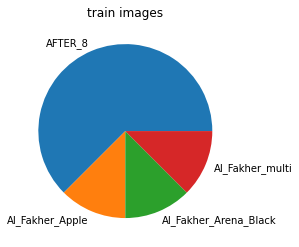

In [81]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values, labels=flowers)
plt.show()

# Train & Test Data Generation

## 0
Теперь нам нужно разделить данные на обучение и тестирование, и после этого мы собираемся разделить целевые значения из фреймов данных.

In [82]:
train=pd.concat([y_train,X_train],axis=1)
# test=pd.concat([y_test,X_test],axis=1)

После получения данных поезда и тестирования мы перемешиваем данные, что приведет к уничтожению ненужных шаблонов.

In [83]:
train=train.sample(frac=1)
# test=test.sample(frac=1)

In [84]:
train.head(3)

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,1.0,0.985621,0.988235,0.994118,0.985621,0.988235,0.994118,0.985621,0.988235,0.994118,...,0.994118,0.985621,0.988235,0.994118,0.985621,0.988235,0.994118,0.985621,0.988235,0.994118


## X and Y preparation
Сейчас мы готовим X_train, y_train, X_test и y_test, которые будут загружены после некоторых процессов.

In [85]:
X_train=train.drop('label',1)
y_train=train['label']
# X_test=test.drop('label',1)
# y_test=test['label']

In [86]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
# X_test=X_test.to_numpy()
# y_test=y_test.to_numpy()

In [87]:
y_train=y_train.astype('int64')
# y_test=y_test.astype('int64')

Поскольку мы должны найти ответы для обычных людей, мы также используем массив цветов в качестве декодера, так как название цветов было закодировано.

In [88]:
decoder=flowers
decoder

['AFTER_8', 'Al_Fakher_Apple', 'Al_Fakher_Arena_Black', 'Al_Fakher_multi']

Поскольку изображения сглаживаются, мы должны изменить их форму для визуализации.

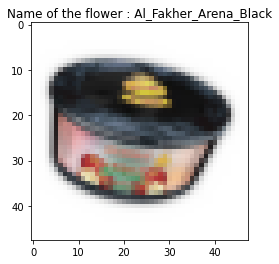

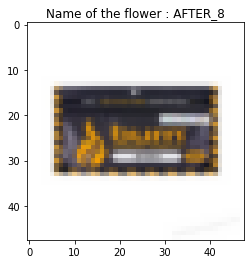

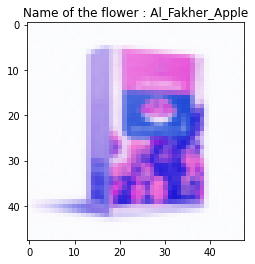

In [89]:
for i in range(3):
    #print('Type of flower :',decoder[y_train[i]])
    plt.title('Name of the flower : ' + decoder[y_train[i]])
    plt.imshow(X_train[i].reshape(48, 48, 3))
    plt.show()

In [90]:
X_train.shape,X_test.shape

((8, 6912), (2, 6912))

## Reshaping
Теперь мы изменяем форму трейна и теста, поскольку собираемся вводить данные в сверточные нейронные сети.

In [91]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 3)
# X_test = X_test.reshape(866, 48, 48, 3)
y_train = y_train.reshape(X_train.shape[0], 1)
# y_test = y_test.reshape(866, 1)

Это изменение формы данных привело к созданию четырехмерного набора данных. Когда он будет встроен в нейронную сеть, он преобразуется в 4-мерные тензоры, которые будут определять прогноз.

# Model Generation
Генерация модели: По мере создания данных мы собираемся построить нашу модель. Есть несколько очень популярных моделей классификации изображений, например
- Inception V3 
- ResNet 
- MobileNet. 

Но здесь мы собираемся создать нашу собственную модель, потому что она должна быть привычкой любого изучающего DL или профессионала DL. Наша модель будет иметь несколько уровней Dense и ConvNet в последовательной структуре.

In [92]:
model = Sequential()

model.add(Conv2D(64, activation='relu', kernel_size=(3, 3), input_shape=X_train[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

После создания модели давайте посмотрим на краткое изложение модели.

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
dense (Dense)                (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

Now we are compiling our model with custom metrics .

We are using:
1. Optimizer ---> Adam (default)
2. Loss ---> Sparse Categorical Crossentropy
3. Metrics ---> Accuracy

In [94]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

И вот мы подошли к самой интересной части всего нашего проекта - **MODEL FITTING**. Мы собираемся объявить размер батча равным 10, что будет соответствовать точности модели и времени. Мы используем 7 эпох для обучения модели, и мы используем тестовые данные в качестве проверки, и, в конце концов, мы также добавляем подробности, так как мы можем видеть, как развивается модель NN. Мы собираемся сохранить эту подгонку в переменной `hist`, чтобы мы могли видеть, как работает модель, и определять, переообучается ли модель или недостаточно, имеет ли она очень большое смещение или нет.

In [96]:
%%time
hist=model.fit(X_train,y_train,batch_size=10,epochs=7,verbose=1,
#                validation_data=(X_test,y_test)
              )

Epoch 1/7
1/1 [==============================] - 0s 332ms/step - loss: 6.7016 - accuracy: 0.6250
Epoch 2/7
1/1 [==============================] - 0s 317ms/step - loss: 3.3272 - accuracy: 0.6250
Epoch 3/7
1/1 [==============================] - 0s 324ms/step - loss: 2.0607 - accuracy: 0.1250
Epoch 4/7
1/1 [==============================] - 0s 295ms/step - loss: 2.0079 - accuracy: 0.1250
Epoch 5/7
1/1 [==============================] - 0s 318ms/step - loss: 1.1067 - accuracy: 0.7500
Epoch 6/7
1/1 [==============================] - 0s 324ms/step - loss: 1.0989 - accuracy: 0.6250
Epoch 7/7
1/1 [==============================] - 0s 303ms/step - loss: 1.0013 - accuracy: 0.7500
Wall time: 2.39 s


Теперь проверяем работоспособность моделей путем построения графиков.

In [97]:
# plt.plot(hist.history['accuracy'],label='train')
# plt.plot(hist.history['val_accuracy'],label='validation')
# plt.legend()
# plt.show()

После визуализации графика мы можем сказать, что модель лучше всего настраивается между 2-й и 3-ей эпохами, тогда модель начинает переобучаться данными трейна. Таким образом, оптимально настроенная модель дает 60% точности по сравнению с данными валида. Теперь мы собираемся спрогнозировать тестовые данные, составить confusion matrix и сделать выводы.

In [47]:
y_pred=model.predict(X_test)
type(y_pred)

numpy.ndarray

In [48]:
y_final = []
for i in range(len(y_pred)):
    y_final.append(np.argmax(y_pred[i]))
type(y_final[0])

numpy.int64

После долгого поиска в Интернете (XD) я нашел некоторые объяснения этих ошибочных прогнозов. Это - Роза и Тюльпаны - многолетние растения, и их цвета очень похожи. Одуванчик и Маргаритка - цветы газона, поэтому фон должен быть с зеленой травой. У них также есть длинный стебель, поэтому их можно ошибочно предсказать, даже если модель очень хорошо предсказывает. Одуванчики на самом деле напоминают цвет ромашек с зеленым фоном на некоторых и длинных стеблях, что создает неверные прогнозы для всех типов цветов.

In [99]:
unknown = []
unknown = create_dataframe('tobacco_all//new/', unknown, 5)
# dandelion.head(3)

In [101]:
X_unknown = unknown.drop('label',axis=1).to_numpy()

In [102]:
X_unknown = X_unknown.reshape(X_unknown.shape[0], 48, 48, 3)

In [103]:
y_pred_2 = model.predict(X_unknown)

In [104]:
y_final_2 = []

for i in range(len(y_pred_2)):
    y_final_2.append(np.argmax(y_pred_2[i]))
type(y_final_2[0])

numpy.int64

In [105]:
np.argmax(y_pred_2[i])

3

In [106]:
flowers[np.argmax(y_pred_2[i])]

'Al_Fakher_multi'

In [107]:
X_unknown = unknown.drop('label', 1).to_numpy()
X_unknown = X_unknown.reshape(X_unknown.shape[0], 48, 48, 3)
y_pred_2 = model.predict(X_unknown)

print(flowers[np.argmax(y_pred_2[i])])

Al_Fakher_multi


---

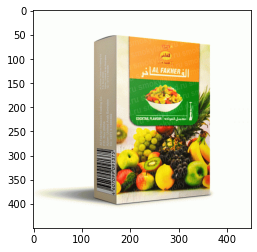

AFTER_8


In [112]:
k = 0
for fil in os.listdir('tobacco_all//new/'):
    link = 'tobacco_all/new/' + fil
    img = mpimg.imread(link)
    plt.imshow(img)
    plt.show()
    k += 1
    if k == 3:
        break
    
    unknown = []
    unknown = create_dataframe('tobacco_all/new/', unknown, 6)
    
    X_unknown = unknown.drop('label', axis=1).to_numpy()
    X_unknown = X_unknown.reshape(X_unknown.shape[0], 48, 48, 3)
    y_pred_2 = model.predict(X_unknown)

    print(flowers[np.argmax(y_pred_2[i])])